# Exploratory Data Analysis

In [ ]:
%pip install seaborn

In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def fileCounter(directory: str):
    lst = os.listdir(directory)
    fileCount = len(lst)
    
    return fileCount

In [4]:
trainingPizzaPath = 'pizza-notpizza/train/pizza'
trainingNotPizzaPath = 'pizza-notpizza/train/not_pizza'

validationPizzaPath = 'pizza-notpizza/val/pizza'
validationNotPizzaPath = 'pizza-notpizza/val/not_pizza'

testingPizzaPath = 'pizza-notpizza/test/pizza'
testingNotPizzaPath = 'pizza-notpizza/test/not_pizza'

In [5]:
trainPizzaCount = fileCounter(trainingPizzaPath)
trainNotPizzaCount = fileCounter(trainingNotPizzaPath)

training = [trainPizzaCount, trainNotPizzaCount]
training

[787, 786]

In [6]:
valPizzaCount = fileCounter(validationPizzaPath)
valNotPizzaCount = fileCounter(validationNotPizzaPath)

validation = [valPizzaCount, valNotPizzaCount]
validation

[98, 98]

In [7]:
testPizzaCount = fileCounter(testingPizzaPath)
testNotPizzaCount = fileCounter(testingNotPizzaPath)

testing = [testPizzaCount, testNotPizzaCount]
testing

[99, 99]

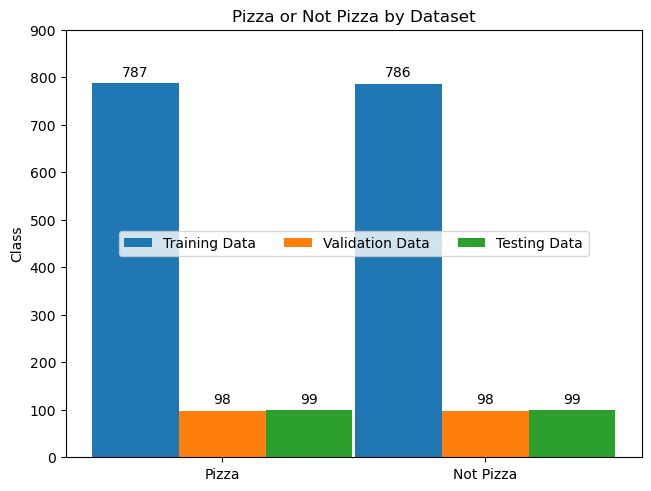

In [8]:
classes = ['Pizza', 'Not Pizza']
classesCount = {
    'Training Data': training,
    'Validation Data': validation,
    'Testing Data': testing
}

x = np.arange(len(classes))
width = 0.33
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for dataset, eachClassCount in classesCount.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, eachClassCount, width, label = dataset)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('Quantity')
ax.set_ylabel('Class')
ax.set_title('Pizza or Not Pizza by Dataset')
ax.set_xticks(x + width, classes)
ax.legend(loc = 'center', ncols = 3)
ax.set_ylim(0, 900)

plt.show()

# First attepmt to train
- Lasso Regularization
- CNN Network
- 3 x 256 x 256 input size

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.transforms.functional as F
from torchvision.transforms import v2

import torchmetrics as metrics

from sklearn.metrics import confusion_matrix, classification_report

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please

In [12]:
trainData = 'pizza-notpizza/train'
valData = 'pizza-notpizza/val'
testData = 'pizza-notpizza/test'

In [13]:
trainTransforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.3, contrast=0.5, saturation=0.3),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

valTestTransforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

trainDataset = datasets.ImageFolder(trainData, transform=trainTransforms)
valDataset = datasets.ImageFolder(valData, transform=valTestTransforms)
testDataset = datasets.ImageFolder(testData, transform=valTestTransforms)

In [42]:
class_to_idx = trainDataset.class_to_idx

for label, value in class_to_idx.items():
    print(f'Class Name: {label}, Numeric Value: {value}')

Class Name: not_pizza, Numeric Value: 0
Class Name: pizza, Numeric Value: 1


In [14]:
trainDataset[3]

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044,

In [15]:
BATCH_SIZE = 64
NUM_WORKERS = 4
LEARNING_RATE = 0.0025
WEIGHT_DECAY = 1e-5

In [16]:
trainLoader = torch.utils.data.DataLoader(trainDataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
valLoader = torch.utils.data.DataLoader(valDataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
testLoader = torch.utils.data.DataLoader(testDataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

In [46]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        
        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 2)
        
        self.dropout = nn.Dropout(0.6)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
    def forward(self, x):
        x = self.pool(nn.functional.leaky_relu(self.conv1(x)))
        x = self.pool(nn.functional.leaky_relu(self.conv2(x)))
        x = self.pool(nn.functional.leaky_relu(self.conv3(x)))
        
        x = x.view(x.size(0), -1)
        
        x = nn.functional.leaky_relu(self.fc1(x))
        x = self.dropout(x)
        x = nn.functional.leaky_relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x

In [20]:
def trainingLoop(optimizer, model, criterion, trainLoader, valLoader, trainLossHistory, epochs = 50, patience=5, minDelta = 0.001):
    bestValLoss = float('inf')
    epochNoImprove = 0
    
    for epoch in range(epochs):
        model.train()
        trainLoss = 0.0
        
        for i, data in enumerate(trainLoader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            trainLoss += loss.item()
        
        epochLoss = trainLoss / len(trainLoader)
        trainLossHistory.append(epochLoss)
        
        #print('epochs')
            
        if (epoch + 1) % 5 == 0:
            model.eval()
            valLoss = 0.0
            correct = 0
            total = 0
            
            with torch.no_grad():
                for i, data in enumerate(valLoader, 0):
                    inputs, labels = data
                    inputs, labels = inputs.to(device), labels.to(device)
                    
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    preds = torch.argmax(outputs, dim=1)
                    total += labels.shape[0]
                    correct += int((preds == labels).sum())
                    
                valLoss /= len(valLoader.dataset)
                valAcc = correct / total
                
            print(f'=== EPOCH {epoch+1} ===\n    Train Loss: {epochLoss}, Validation Loss: {valLoss}, Validation Accuracy: {valAcc:.2f}\n')
            
            if valLoss < bestValLoss - minDelta:
                bestValLoss = valLoss
                epochsNoImprove = 0
            else:
                epochsNoImprove += 1
                
            if epochsNoImprove >= patience:
                print(f'Early Stoping triggered after {epoch + 1} epochs')
                break

In [52]:
model = CNN()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

trainLossHistory = []

trainingLoop(
    optimizer,
    model,
    criterion,
    trainLoader,
    valLoader,
    trainLossHistory
)

=== EPOCH 5 ===
    Train Loss: 0.6078059482574463, Validation Loss: 0.0, Validation Accuracy: 0.59

=== EPOCH 10 ===
    Train Loss: 0.5609029686450958, Validation Loss: 0.0, Validation Accuracy: 0.69

=== EPOCH 15 ===
    Train Loss: 0.5839773297309876, Validation Loss: 0.0, Validation Accuracy: 0.72

=== EPOCH 20 ===
    Train Loss: 0.44275723695755004, Validation Loss: 0.0, Validation Accuracy: 0.78

=== EPOCH 25 ===
    Train Loss: 0.4190908741950989, Validation Loss: 0.0, Validation Accuracy: 0.79

=== EPOCH 30 ===
    Train Loss: 0.4006766355037689, Validation Loss: 0.0, Validation Accuracy: 0.84

Early Stoping triggered after 30 epochs


In [21]:
def validate(model, trainLoader, valLoader):
    model.eval()
    
    for name, loader in [('Train', trainLoader), ('Val', valLoader)]:
        correct = 0
        total = 0
        
        with torch.no_grad():
            for inputs, labels in loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                preds = torch.argmax(outputs, dim=1)
                total += labels.shape[0]
                correct += int((preds == labels).sum())
                
        print(f'{name} Accuracy: {correct / total}')

In [55]:
validate(model, trainLoader, valLoader)

Train Accuracy: 0.8397965670692944
Val Accuracy: 0.8418367346938775


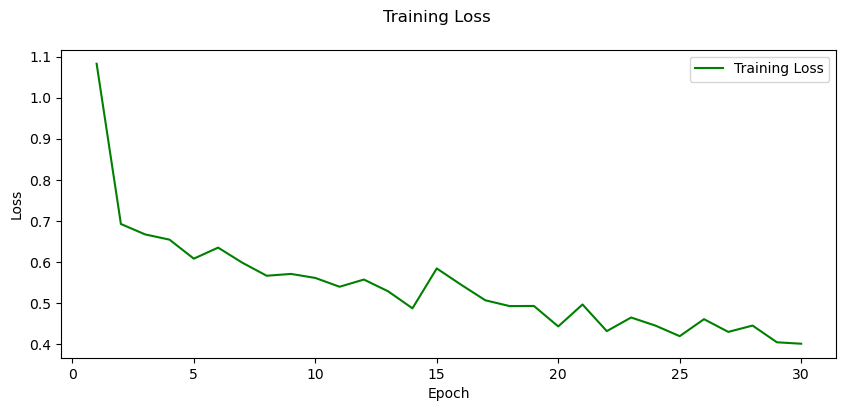

In [56]:
plt.figure(figsize=(10,4))
plt.plot(range(1, len(trainLossHistory) + 1), trainLossHistory, color='green', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.suptitle('Training Loss')
plt.legend()

plt.show()

In [57]:
model.eval()
correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in testLoader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())
        
acc = 100 * correct / total

print('Accuracy of the network on the test images: %d %%' % acc)

Accuracy of the network on the test images: 81 %


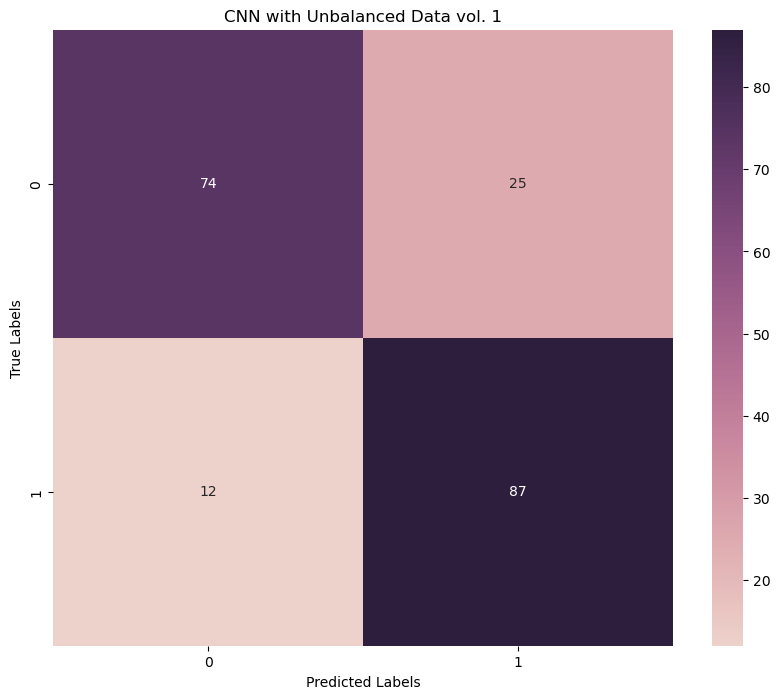

In [58]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

class_names = [str(i) for i in range(2)]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CNN with Unbalanced Data vol. 1')
plt.savefig('conf_matrix_cnn1.png')

plt.show()

In [59]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        99
           1       0.78      0.88      0.82        99

    accuracy                           0.81       198
   macro avg       0.82      0.81      0.81       198
weighted avg       0.82      0.81      0.81       198



In [60]:
f1 = metrics.classification.BinaryF1Score()
f1_score = f1(torch.tensor(predicted_labels), torch.tensor(true_labels))
prec = metrics.classification.BinaryPrecision()
precision = prec(torch.tensor(predicted_labels), torch.tensor(true_labels))
rec = metrics.classification.BinaryRecall()
recall = rec(torch.tensor(predicted_labels), torch.tensor(true_labels))

print(f'F1-Score: {f1_score * 100}, Precision: {precision * 100}, Recall: {recall * 100}')

F1-Score: 82.4644546508789, Precision: 77.67857360839844, Recall: 87.8787841796875


In [62]:
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizeer_state_dict': optimizer.state_dict(),
},     'CNN_model.pth')

## VGG16

In [17]:
from torchvision.models import vgg16

In [18]:
model = vgg16(pretrained=True)

for param in model.parameters():
    param.requires_grad = False
    
num_ftrs = model.classifier[6].in_features

model.classifier[6] = nn.Linear(num_ftrs, 2)

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

trainLossHistory = []

trainingLoop(
    optimizer,
    model,
    criterion,
    trainLoader,
    valLoader,
    trainLossHistory
)

=== EPOCH 5 ===
    Train Loss: 0.2525026670098305, Validation Loss: 0.0, Validation Accuracy: 0.93

=== EPOCH 10 ===
    Train Loss: 0.28465427339077, Validation Loss: 0.0, Validation Accuracy: 0.93

=== EPOCH 15 ===
    Train Loss: 0.299717606306076, Validation Loss: 0.0, Validation Accuracy: 0.93

=== EPOCH 20 ===
    Train Loss: 0.26658187314867976, Validation Loss: 0.0, Validation Accuracy: 0.91

=== EPOCH 25 ===
    Train Loss: 0.23625666603446008, Validation Loss: 0.0, Validation Accuracy: 0.94

=== EPOCH 30 ===
    Train Loss: 0.28332705587148665, Validation Loss: 0.0, Validation Accuracy: 0.95

Early Stoping triggered after 30 epochs


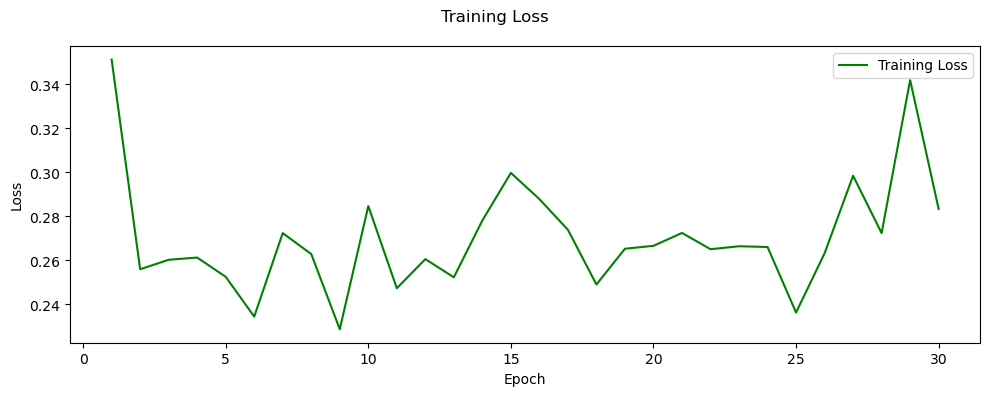

In [23]:
plt.figure(figsize=(10,4))
plt.plot(range(1, len(trainLossHistory) + 1), trainLossHistory, color='green', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.suptitle('Training Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
validate(model, trainLoader, valLoader)

Train Accuracy: 0.9376986649713922
Val Accuracy: 0.9540816326530612


In [25]:
model.eval()
correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in testLoader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())
        
acc = 100 * correct / total

print('Accuracy of the network on the test images: %d %%' % acc)

Accuracy of the network on the test images: 91 %


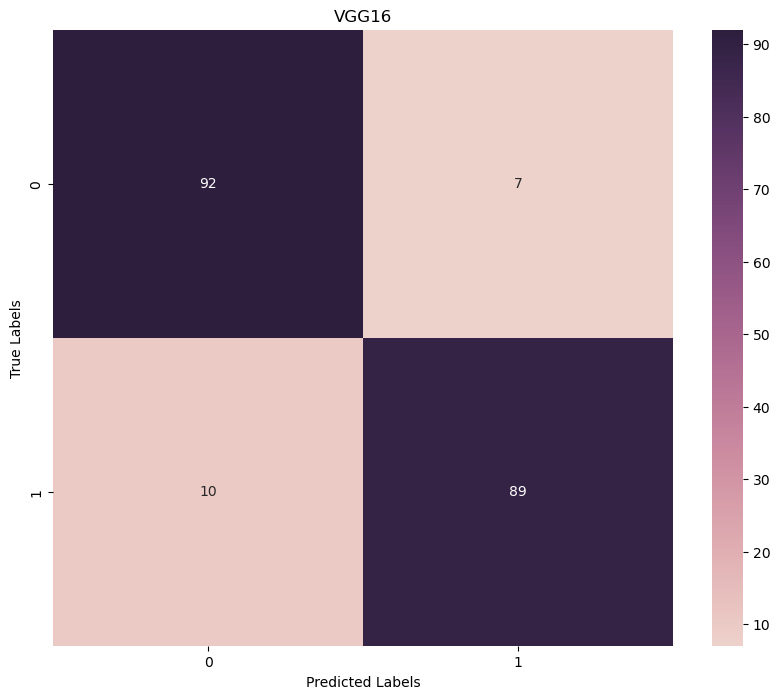

In [27]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

class_names = [str(i) for i in range(2)]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('VGG16')

plt.show()

In [28]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        99
           1       0.93      0.90      0.91        99

    accuracy                           0.91       198
   macro avg       0.91      0.91      0.91       198
weighted avg       0.91      0.91      0.91       198



In [29]:
f1 = metrics.classification.BinaryF1Score()
f1_score = f1(torch.tensor(predicted_labels), torch.tensor(true_labels))
prec = metrics.classification.BinaryPrecision()
precision = prec(torch.tensor(predicted_labels), torch.tensor(true_labels))
rec = metrics.classification.BinaryRecall()
recall = rec(torch.tensor(predicted_labels), torch.tensor(true_labels))

print(f'F1-Score: {f1_score * 100}, Precision: {precision * 100}, Recall: {recall * 100}')

F1-Score: 91.28205108642578, Precision: 92.70832824707031, Recall: 89.89899444580078


In [30]:
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizeer_state_dict': optimizer.state_dict(),
},     'VGG16_model.pth')

# ResNet18 + Data Augmentation

In [33]:
from torchvision.models import resnet50

In [38]:
model = resnet50(pretrained=True)

for param in model.parameters():
    param.requires_grad = False
    
num_ftrs = model.fc.in_features

model.fc = nn.Linear(num_ftrs, 2)

In [40]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = LEARNING_RATE, weight_decay=WEIGHT_DECAY)

trainLossHistory = []

trainingLoop(
    optimizer,
    model,
    criterion,
    trainLoader,
    valLoader,
    trainLossHistory
)

=== EPOCH 5 ===
    Train Loss: 0.22496493488550187, Validation Loss: 0.0, Validation Accuracy: 0.93

=== EPOCH 10 ===
    Train Loss: 0.23750895589590074, Validation Loss: 0.0, Validation Accuracy: 0.92

=== EPOCH 15 ===
    Train Loss: 0.19265056148171425, Validation Loss: 0.0, Validation Accuracy: 0.92

=== EPOCH 20 ===
    Train Loss: 0.26939156383275986, Validation Loss: 0.0, Validation Accuracy: 0.89

=== EPOCH 25 ===
    Train Loss: 0.19233472660183906, Validation Loss: 0.0, Validation Accuracy: 0.88

=== EPOCH 30 ===
    Train Loss: 0.178234483897686, Validation Loss: 0.0, Validation Accuracy: 0.89

Early Stoping triggered after 30 epochs


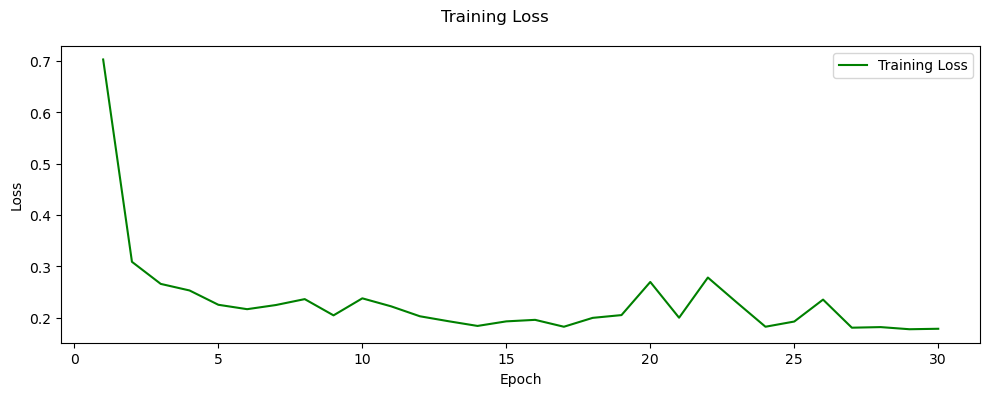

In [41]:
plt.figure(figsize=(10,4))
plt.plot(range(1, len(trainLossHistory) + 1), trainLossHistory, color='green', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.suptitle('Training Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
validate(model, trainLoader, valLoader)

Train Accuracy: 0.9154481881754609
Val Accuracy: 0.8877551020408163


In [44]:
model.eval()

correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in testLoader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())
        
acc = 100 * correct / total

print('Accuracy of the network on the test images: %d %%' % acc)

Accuracy of the network on the test images: 89 %


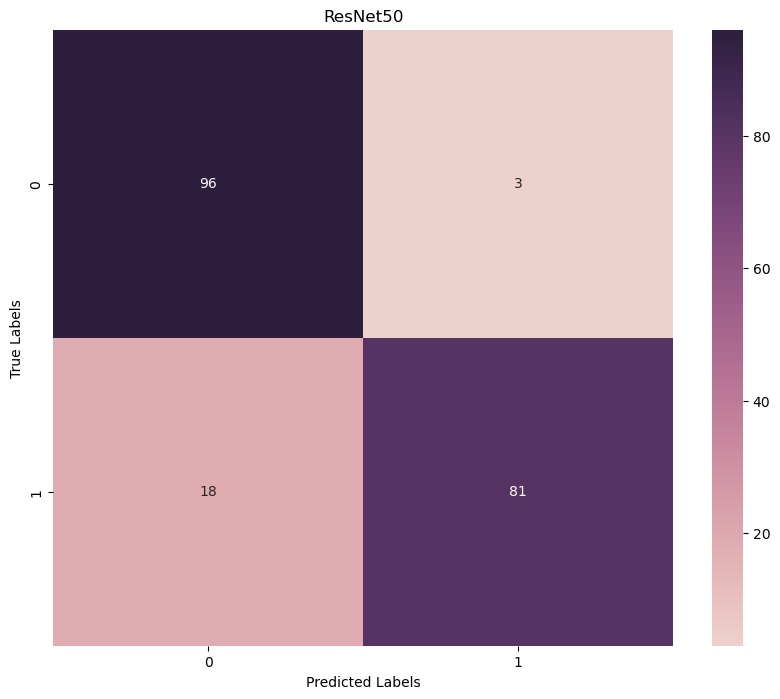

In [45]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_names = [str(i) for i in range(2)]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('ResNet50')
plt.savefig('resnet18confmatrix.png')

plt.show()

In [46]:
report = classification_report(true_labels, predicted_labels)

print(report)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        99
           1       0.96      0.82      0.89        99

    accuracy                           0.89       198
   macro avg       0.90      0.89      0.89       198
weighted avg       0.90      0.89      0.89       198



In [47]:
f1 = metrics.F1Score(task='multiclass', num_classes=4)
f1 = f1(torch.tensor(predicted_labels), torch.tensor(true_labels)) * 100

prec = metrics.Precision(task='multiclass', average='macro', num_classes=4)
prec = prec(torch.tensor(predicted_labels), torch.tensor(true_labels)) * 100

recall = metrics.Recall(task='multiclass', average='macro', num_classes=4)
recall = recall(torch.tensor(predicted_labels), torch.tensor(true_labels)) * 100

print(f'F1 Score: {f1}, Precision: {prec}, Recall: {recall}')

F1 Score: 89.39393615722656, Precision: 90.31954956054688, Recall: 89.39393615722656


In [48]:
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizeer_state_dict': optimizer.state_dict(),
},     'ResNet50_model.pth')